# Trying Spectrograms
Here I want to compute the Mel Spectrograms of the audio clips just to see how it looks like

In [33]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import time

## Try on a single clip first

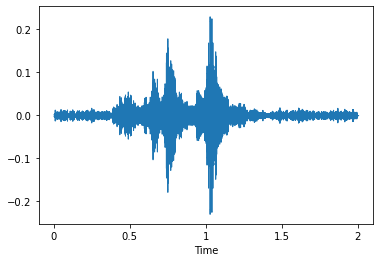

In [31]:
y, sr = librosa.load('AudioWAV/1001_DFA_SAD_XX.wav')
librosa.display.waveshow(y, sr=sr)

In [38]:
# These variables have default values, but we'll override them for sake of the example
n_fft=2048
hop_length=512
n_mels=128

S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)

fig = plt.figure()
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');

plt.colorbar(format='%+2.0f dB');
plt.title('Example 1')
fig.savefig('MelSpectrogram example.png', bbox_inches='tight',
            facecolor='white', transparent=False)


## Now do it for all clips
**Note!** This is a long computation. It took 27 minutes in my laptop. You may not want to do this unless necessary.

In [29]:
files = os.listdir('AudioWAV')
files[0].split('.')[0]

'1001_DFA_ANG_XX'

In [43]:
plt.ioff()

files = os.listdir('AudioWAV')
# You can select which files to convert here


time_start = time.time()
for file_name in files:
    file_name = file_name.split('.')[0]
    y, sr = librosa.load('AudioWAV/%s.wav' %file_name)

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_DB = librosa.power_to_db(S, ref=np.max)

    fig = plt.figure()
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel');

    plt.colorbar(format='%+2.0f dB');
    plt.title(file_name.split('.')[0])
    fig.savefig('Spectrograms/%s.png' %file_name,
                bbox_inches='tight',
                facecolor='white', transparent=False)
    plt.close()

time_end = time.time()
time_total = time_end-time_start

print('Number of files: %i' %(len(files)))
if time_total <= 60:
    print('Duration: %f (s)' %time_total)
elif 60 < time_total <= 3600:
    print('Duration: %f (min)' %(time_total/60))
else:
    print('Duration: %f (h)' %(time_total/3600))

Number of files: 7442
Duration: 27.423871 (min)


Note: Duration per number of files
- 10 files: 2.039712 (s)
- 100 files: 20.880895 (s)
- 7442 files: 27.423871 (min)